In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pypianoroll
import matplotlib.pyplot as plt
import pandas as pd
import glob

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2021-11-24 14:01:59.238197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-24 14:01:59.238214: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [17]:
from music_generator.midi import play_pianoroll, sample_multitrack, plot_pianoroll
from music_generator.data import get_npz_data

In [7]:
files = glob.glob('../**/*.npz', recursive=True)

In [8]:
multitracks = [pypianoroll.load(fp) for fp in files[0:10]]

In [57]:
mtrack = multitracks[9]

In [58]:
piano = mtrack.tracks[1]
drums = mtrack.tracks[1]

In [80]:
X, y = sample_multitrack(mtrack, drums, 10, 10)

In [81]:
X.shape

(13, 240, 128)

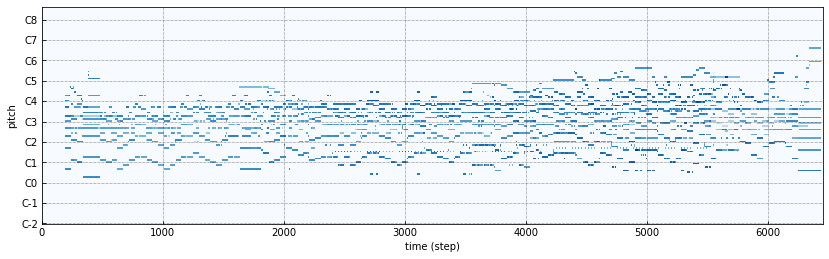

In [82]:
plot_pianoroll(drums.pianoroll)

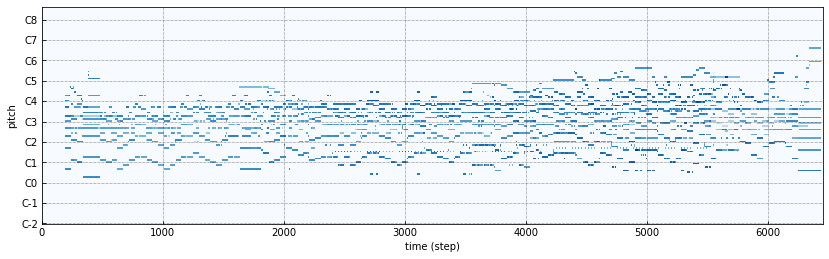

In [83]:
plot_pianoroll(piano.pianoroll)

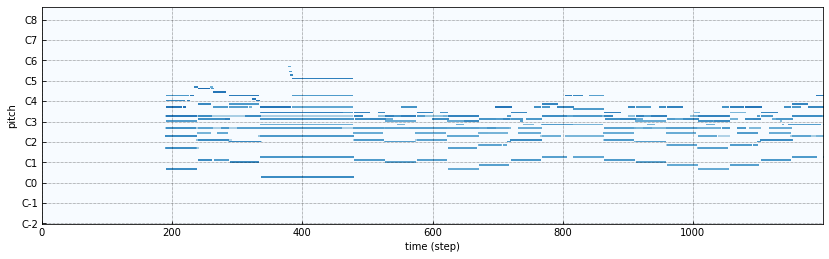

In [84]:
plot_pianoroll(pianoroll=X[0:5])

In [85]:
play_pianoroll(mtrack, pianoroll=X[0:2])

In [86]:
def init_model(X, y):
    input_shape = X[0].shape
    output_shape = y[0].shape[1]
    model = models.Sequential()
    model.add(layers.SimpleRNN(128, return_sequences=True, activation='tanh', input_shape=input_shape))
    model.add(layers.SimpleRNN(128 * 4, return_sequences=True, activation='tanh'))
    model.add(layers.Dense(output_shape*4, activation='relu'))
    model.add(layers.Dense(output_shape, activation='relu'))
    model.compile(loss='mse', optimizer=RMSprop(learning_rate=0.005))
    return model

model = init_model(X, y)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 240, 128)          32896     
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 240, 512)          328192    
                                                                 
 dense_9 (Dense)             (None, 240, 512)          262656    
                                                                 
 dense_10 (Dense)            (None, 240, 128)          65664     
                                                                 
Total params: 689,408
Trainable params: 689,408
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = model.fit(X, y, validation_split=0.2, epochs=200, batch_size=16, workers=4, use_multiprocessing=True)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 295.3977 - val_loss: 346.7379
Epoch 2/200
1/1 [==============================] - 0s 191ms/step - loss: 257.1898 - val_loss: 813.9903
Epoch 3/200
1/1 [==============================] - 0s 175ms/step - loss: 649.8592 - val_loss: 345.1063
Epoch 4/200
1/1 [==============================] - 0s 189ms/step - loss: 246.0691 - val_loss: 318.3968
Epoch 5/200
1/1 [==============================] - 0s 209ms/step - loss: 211.1759 - val_loss: 314.3289
Epoch 6/200
1/1 [==============================] - 0s 208ms/step - loss: 202.4371 - val_loss: 313.3855
Epoch 7/200
1/1 [==============================] - 0s 175ms/step - loss: 199.9666 - val_loss: 312.1473
Epoch 8/200
1/1 [==============================] - 0s 204ms/step - loss: 200.6923 - val_loss: 317.9808
Epoch 9/200
1/1 [==============================] - 0s 218ms/step - loss: 197.1452 - val_loss: 308.2041
Epoch 10/200
1/1 [==============================] - 0s 181ms/step - loss: 19

Epoch 80/200
1/1 [==============================] - 0s 235ms/step - loss: 121.6329 - val_loss: 381.5607
Epoch 81/200
1/1 [==============================] - 0s 187ms/step - loss: 121.9712 - val_loss: 356.9914
Epoch 82/200
1/1 [==============================] - 0s 190ms/step - loss: 130.5190 - val_loss: 406.8205
Epoch 83/200
1/1 [==============================] - 0s 183ms/step - loss: 140.2319 - val_loss: 390.6764
Epoch 84/200
1/1 [==============================] - 0s 196ms/step - loss: 130.9768 - val_loss: 354.1222
Epoch 85/200
1/1 [==============================] - 0s 170ms/step - loss: 119.0308 - val_loss: 374.5492
Epoch 86/200
1/1 [==============================] - 0s 182ms/step - loss: 110.9271 - val_loss: 352.7733
Epoch 87/200
1/1 [==============================] - 0s 177ms/step - loss: 111.9601 - val_loss: 383.4232
Epoch 88/200
1/1 [==============================] - 0s 182ms/step - loss: 117.2925 - val_loss: 373.4663
Epoch 89/200
1/1 [==============================] - 0s 248ms/ste

1/1 [==============================] - 0s 192ms/step - loss: 94.5463 - val_loss: 386.9876
Epoch 159/200
1/1 [==============================] - 0s 192ms/step - loss: 118.6929 - val_loss: 375.0155
Epoch 160/200
1/1 [==============================] - 0s 172ms/step - loss: 101.3628 - val_loss: 389.7802
Epoch 161/200
1/1 [==============================] - 0s 170ms/step - loss: 97.2106 - val_loss: 400.3031
Epoch 162/200
1/1 [==============================] - 0s 183ms/step - loss: 86.1568 - val_loss: 379.3940
Epoch 163/200
1/1 [==============================] - 0s 195ms/step - loss: 82.6715 - val_loss: 400.5159
Epoch 164/200
1/1 [==============================] - 0s 180ms/step - loss: 78.8392 - val_loss: 409.2535
Epoch 165/200
1/1 [==============================] - 0s 179ms/step - loss: 76.7793 - val_loss: 373.4455
Epoch 166/200
1/1 [==============================] - 0s 187ms/step - loss: 87.8831 - val_loss: 407.2975
Epoch 167/200
1/1 [==============================] - 0s 170ms/step - loss: 8

In [94]:
X.shape

(13, 240, 128)

In [95]:
pred = model.predict(X[10:13]).astype(np.uint8)

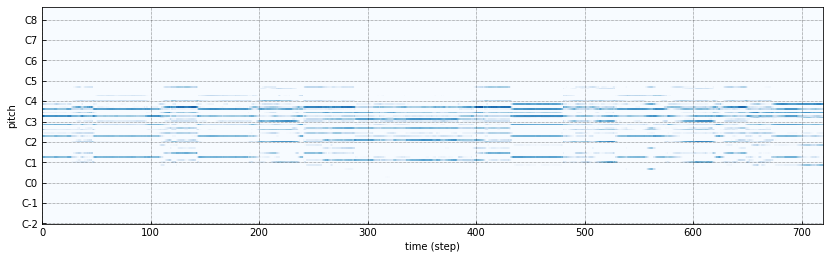

In [96]:
plot_pianoroll(pred)

In [97]:
play_pianoroll(mtrack, pred)